In [1]:
import sys
sys.path.append('..')

In [2]:
import torch
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import random
import torch.nn as nn
import torch.nn.functional as F
import seaborn as sns

In [3]:
from core.getdata import *
from core.dataset import *
from core.dataset2 import * 
from core.network import *
from core.trainer import *
from core.visualization import *

In [4]:
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor

In [5]:
ligands = ["TNF", "R84", "PIC", "P3K", "FLA", "CpG", "FSL", "LPS", "UST"]
polarization = ["", "ib", "ig", "i0", "i3", "i4"]
size = 1288 # replicated

In [6]:
data1 = DatasetSplit(ligands, polarization, 1, size)
data2 = DatasetSplit(ligands, polarization, 2, size)

In [7]:
print(data1.data.shape, data2.data.shape)

(69552, 98, 1) (69552, 98, 1)


In [8]:
train1, test1, val1 = torch.utils.data.random_split(data1, [41732, 13910, 13910])
train2, test2, val2 = torch.utils.data.random_split(data2, [41732, 13910, 13910])

In [9]:
trainloader1 = torch.utils.data.DataLoader(train1, batch_size=64, shuffle=True)
testloader1 = torch.utils.data.DataLoader(test1, batch_size=64, shuffle=True)
valloader1 = torch.utils.data.DataLoader(val1, batch_size=64, shuffle=True)

trainloader2 = torch.utils.data.DataLoader(train2, batch_size=64, shuffle=True)
testloader2 = torch.utils.data.DataLoader(test2, batch_size=64, shuffle=True)
valloader2 = torch.utils.data.DataLoader(val2, batch_size=64, shuffle=True)

In [10]:
# hyperparameters
input_size = 1
hidden_size = 98
output_size = 9

lr = 0.001
epochs = 70
batch_size = 64

device = torch.device('cuda')

In [11]:
net = LSTM(input_size=input_size, hidden_sizes=hidden_size, output_size=output_size, num_layers=3, device=device)

In [12]:
net.train()

LSTM(
  (lstm): LSTM(1, 98, num_layers=3, batch_first=True)
  (fc1): Linear(in_features=98, out_features=9, bias=True)
)

In [13]:
trainer = LSTMTrainer(model=net, device=device)

In [14]:
trainer.train(trainloader1, valloader1, batch_size=batch_size, n_epochs=epochs)

  1%|█▏                                                                                 | 1/70 [00:08<09:44,  8.47s/it]

Epoch 001: | Training Loss: 2.142954780350783 | Validation Loss: 2.1869931986572544


  3%|██▎                                                                                | 2/70 [00:16<09:06,  8.03s/it]

Epoch 002: | Training Loss: 2.137690861046223 | Validation Loss: 2.1200444359298145


  4%|███▌                                                                               | 3/70 [00:23<08:48,  7.89s/it]

Epoch 003: | Training Loss: 2.0938243610387923 | Validation Loss: 2.094157924345874


  6%|████▋                                                                              | 4/70 [00:31<08:37,  7.84s/it]

Epoch 004: | Training Loss: 2.089852597958096 | Validation Loss: 2.1036573735945816


  7%|█████▉                                                                             | 5/70 [00:39<08:26,  7.79s/it]

Epoch 005: | Training Loss: 2.08750686966807 | Validation Loss: 2.050514864265372


  9%|███████                                                                            | 6/70 [00:47<08:16,  7.75s/it]

Epoch 006: | Training Loss: 2.0523567825875273 | Validation Loss: 2.06751866406257


 10%|████████▎                                                                          | 7/70 [00:54<08:09,  7.77s/it]

Epoch 007: | Training Loss: 2.0330637592999166 | Validation Loss: 2.003397150870857


 11%|█████████▍                                                                         | 8/70 [01:02<08:00,  7.75s/it]

Epoch 008: | Training Loss: 2.001590660118582 | Validation Loss: 1.9803557220948946


 13%|██████████▋                                                                        | 9/70 [01:10<07:52,  7.74s/it]

Epoch 009: | Training Loss: 1.9574064501942026 | Validation Loss: 1.9428576395052288


 14%|███████████▋                                                                      | 10/70 [01:17<07:43,  7.73s/it]

Epoch 010: | Training Loss: 1.9136637578879527 | Validation Loss: 1.886624799409044


 16%|████████████▉                                                                     | 11/70 [01:25<07:35,  7.71s/it]

Epoch 011: | Training Loss: 1.8778830113126161 | Validation Loss: 1.8252892751212513


 17%|██████████████                                                                    | 12/70 [01:33<07:27,  7.72s/it]

Epoch 012: | Training Loss: 1.7735091676025625 | Validation Loss: 1.718226380304459


 19%|███████████████▏                                                                  | 13/70 [01:41<07:20,  7.73s/it]

Epoch 013: | Training Loss: 1.7213080882295897 | Validation Loss: 1.715647292793344


 20%|████████████████▍                                                                 | 14/70 [01:48<07:12,  7.72s/it]

Epoch 014: | Training Loss: 1.6851536723775118 | Validation Loss: 1.6482895935347321


 21%|█████████████████▌                                                                | 15/70 [01:56<07:05,  7.73s/it]

Epoch 015: | Training Loss: 1.648014932916504 | Validation Loss: 1.6465200568557878


 23%|██████████████████▋                                                               | 16/70 [02:04<06:57,  7.73s/it]

Epoch 016: | Training Loss: 1.6269603618984019 | Validation Loss: 1.5854761037257834


 24%|███████████████████▉                                                              | 17/70 [02:12<06:49,  7.74s/it]

Epoch 017: | Training Loss: 1.5994544180757602 | Validation Loss: 1.5826087227655112


 26%|█████████████████████                                                             | 18/70 [02:19<06:43,  7.76s/it]

Epoch 018: | Training Loss: 1.5828110538251914 | Validation Loss: 1.5556921417560052


 27%|██████████████████████▎                                                           | 19/70 [02:27<06:35,  7.75s/it]

Epoch 019: | Training Loss: 1.7692210166779265 | Validation Loss: 1.6986677537270642


 29%|███████████████████████▍                                                          | 20/70 [02:35<06:31,  7.84s/it]

Epoch 020: | Training Loss: 1.6643774281234507 | Validation Loss: 1.6876699957278891


 30%|████████████████████████▌                                                         | 21/70 [02:43<06:22,  7.81s/it]

Epoch 021: | Training Loss: 1.61061221425055 | Validation Loss: 1.563052301559973


 31%|█████████████████████████▊                                                        | 22/70 [02:51<06:13,  7.79s/it]

Epoch 022: | Training Loss: 1.5496212256812758 | Validation Loss: 1.5146875463494467


 33%|██████████████████████████▉                                                       | 23/70 [02:58<06:05,  7.78s/it]

Epoch 023: | Training Loss: 1.5184115220722707 | Validation Loss: 1.5188389179903432


 34%|████████████████████████████                                                      | 24/70 [03:06<05:57,  7.78s/it]

Epoch 024: | Training Loss: 1.497642653276873 | Validation Loss: 1.4874251227860058


 36%|█████████████████████████████▎                                                    | 25/70 [03:14<05:52,  7.83s/it]

Epoch 025: | Training Loss: 1.471426273286799 | Validation Loss: 1.4647803322984538


 37%|██████████████████████████████▍                                                   | 26/70 [03:22<05:46,  7.88s/it]

Epoch 026: | Training Loss: 1.4496838767167073 | Validation Loss: 1.43380056772757


 39%|███████████████████████████████▋                                                  | 27/70 [03:30<05:38,  7.88s/it]

Epoch 027: | Training Loss: 1.4256781743094895 | Validation Loss: 1.4403559478051071


 40%|████████████████████████████████▊                                                 | 28/70 [03:38<05:29,  7.85s/it]

Epoch 028: | Training Loss: 1.4106137851113383 | Validation Loss: 1.4101062493586758


 41%|█████████████████████████████████▉                                                | 29/70 [03:46<05:20,  7.82s/it]

Epoch 029: | Training Loss: 1.3968122478283564 | Validation Loss: 1.4082669167343629


 43%|███████████████████████████████████▏                                              | 30/70 [03:53<05:11,  7.80s/it]

Epoch 030: | Training Loss: 1.3634216970725592 | Validation Loss: 1.360573024924742


 44%|████████████████████████████████████▎                                             | 31/70 [04:01<05:03,  7.79s/it]

Epoch 031: | Training Loss: 1.3455914686138744 | Validation Loss: 1.3525903700688564


 46%|█████████████████████████████████████▍                                            | 32/70 [04:09<04:56,  7.80s/it]

Epoch 032: | Training Loss: 1.3196132428613228 | Validation Loss: 1.3367671961084417


 47%|██████████████████████████████████████▋                                           | 33/70 [04:17<04:48,  7.79s/it]

Epoch 033: | Training Loss: 1.3068502915033338 | Validation Loss: 1.3190919510815122


 49%|███████████████████████████████████████▊                                          | 34/70 [04:24<04:40,  7.80s/it]

Epoch 034: | Training Loss: 1.280086721614528 | Validation Loss: 1.3082175891880596


 50%|█████████████████████████████████████████                                         | 35/70 [04:32<04:32,  7.79s/it]

Epoch 035: | Training Loss: 1.253887371848955 | Validation Loss: 1.2909075131110095


 51%|██████████████████████████████████████████▏                                       | 36/70 [04:40<04:24,  7.77s/it]

Epoch 036: | Training Loss: 1.2236305809313086 | Validation Loss: 1.2710066817769217


 53%|███████████████████████████████████████████▎                                      | 37/70 [04:48<04:16,  7.77s/it]

Epoch 037: | Training Loss: 1.2028140467670025 | Validation Loss: 1.2603924597075227


 54%|████████████████████████████████████████████▌                                     | 38/70 [04:55<04:08,  7.75s/it]

Epoch 038: | Training Loss: 1.1830848474597493 | Validation Loss: 1.2591587892912943


 56%|█████████████████████████████████████████████▋                                    | 39/70 [05:03<04:00,  7.75s/it]

Epoch 039: | Training Loss: 1.1593395261633086 | Validation Loss: 1.264518641003775


 57%|██████████████████████████████████████████████▊                                   | 40/70 [05:11<03:53,  7.78s/it]

Epoch 040: | Training Loss: 1.1401107428997619 | Validation Loss: 1.2273428325259357


 59%|████████████████████████████████████████████████                                  | 41/70 [05:19<03:45,  7.77s/it]

Epoch 041: | Training Loss: 1.1246691542416583 | Validation Loss: 1.2274574951841197


 60%|█████████████████████████████████████████████████▏                                | 42/70 [05:27<03:37,  7.77s/it]

Epoch 042: | Training Loss: 1.09689630693535 | Validation Loss: 1.200551865024304


 61%|██████████████████████████████████████████████████▎                               | 43/70 [05:34<03:29,  7.77s/it]

Epoch 043: | Training Loss: 1.0895998927937167 | Validation Loss: 1.2055739943587451


 63%|███████████████████████████████████████████████████▌                              | 44/70 [05:42<03:22,  7.77s/it]

Epoch 044: | Training Loss: 1.054350691769061 | Validation Loss: 1.174148196200712


 64%|████████████████████████████████████████████████████▋                             | 45/70 [05:50<03:14,  7.78s/it]

Epoch 045: | Training Loss: 1.0382712766368394 | Validation Loss: 1.1618519086356556


 66%|█████████████████████████████████████████████████████▉                            | 46/70 [05:58<03:07,  7.83s/it]

Epoch 046: | Training Loss: 1.0197761138219381 | Validation Loss: 1.180932821483787


 67%|███████████████████████████████████████████████████████                           | 47/70 [06:06<03:00,  7.84s/it]

Epoch 047: | Training Loss: 1.0132781598505893 | Validation Loss: 1.1637804169173633


 69%|████████████████████████████████████████████████████████▏                         | 48/70 [06:14<02:53,  7.86s/it]

Epoch 048: | Training Loss: 0.9818650020391981 | Validation Loss: 1.154040187050443


 70%|█████████████████████████████████████████████████████████▍                        | 49/70 [06:22<02:46,  7.91s/it]

Epoch 049: | Training Loss: 0.9638921718867596 | Validation Loss: 1.1424424656487386


 71%|██████████████████████████████████████████████████████████▌                       | 50/70 [06:29<02:36,  7.83s/it]

Epoch 050: | Training Loss: 0.9414319598656519 | Validation Loss: 1.1576719874635748


 73%|███████████████████████████████████████████████████████████▋                      | 51/70 [06:37<02:28,  7.79s/it]

Epoch 051: | Training Loss: 0.9471775495987756 | Validation Loss: 1.1236775859233437


 74%|████████████████████████████████████████████████████████████▉                     | 52/70 [06:45<02:21,  7.87s/it]

Epoch 052: | Training Loss: 0.9146534821523459 | Validation Loss: 1.1129716025033127


 76%|██████████████████████████████████████████████████████████████                    | 53/70 [06:53<02:13,  7.83s/it]

Epoch 053: | Training Loss: 0.9068698379201144 | Validation Loss: 1.1127417716411276


 77%|███████████████████████████████████████████████████████████████▎                  | 54/70 [07:00<02:04,  7.77s/it]

Epoch 054: | Training Loss: 0.9029320356582975 | Validation Loss: 1.1376192170545596


 79%|████████████████████████████████████████████████████████████████▍                 | 55/70 [07:08<01:56,  7.79s/it]

Epoch 055: | Training Loss: 0.8782477263834721 | Validation Loss: 1.1046295865960079


 80%|█████████████████████████████████████████████████████████████████▌                | 56/70 [07:16<01:50,  7.86s/it]

Epoch 056: | Training Loss: 0.8494196807991308 | Validation Loss: 1.1027185416549719


 81%|██████████████████████████████████████████████████████████████████▊               | 57/70 [07:24<01:41,  7.83s/it]

Epoch 057: | Training Loss: 0.8363510213256065 | Validation Loss: 1.0897796670778082


 83%|███████████████████████████████████████████████████████████████████▉              | 58/70 [07:32<01:34,  7.87s/it]

Epoch 058: | Training Loss: 0.8339333240781407 | Validation Loss: 1.1067964136600494


 84%|█████████████████████████████████████████████████████████████████████             | 59/70 [07:40<01:27,  7.91s/it]

Epoch 059: | Training Loss: 0.8226438921407024 | Validation Loss: 1.0682439259979704


 86%|██████████████████████████████████████████████████████████████████████▎           | 60/70 [07:48<01:18,  7.89s/it]

Epoch 060: | Training Loss: 0.8133735791829972 | Validation Loss: 1.0702048414344087


 87%|███████████████████████████████████████████████████████████████████████▍          | 61/70 [07:56<01:10,  7.84s/it]

Epoch 061: | Training Loss: 0.7911781513946528 | Validation Loss: 1.087967854574186


 89%|████████████████████████████████████████████████████████████████████████▋         | 62/70 [08:03<01:02,  7.81s/it]

Epoch 062: | Training Loss: 0.7720038810970224 | Validation Loss: 1.0835024927734236


 90%|█████████████████████████████████████████████████████████████████████████▊        | 63/70 [08:11<00:54,  7.78s/it]

Epoch 063: | Training Loss: 0.7460688195586387 | Validation Loss: 1.087349445994841


 91%|██████████████████████████████████████████████████████████████████████████▉       | 64/70 [08:19<00:46,  7.77s/it]

Epoch 064: | Training Loss: 0.7521155227837117 | Validation Loss: 1.0752738952089886


 93%|████████████████████████████████████████████████████████████████████████████▏     | 65/70 [08:26<00:38,  7.75s/it]

Epoch 065: | Training Loss: 0.7420952912037807 | Validation Loss: 1.1308464960220757


 94%|█████████████████████████████████████████████████████████████████████████████▎    | 66/70 [08:34<00:31,  7.77s/it]

Epoch 066: | Training Loss: 0.7776106779918553 | Validation Loss: 1.0753974140784062


 96%|██████████████████████████████████████████████████████████████████████████████▍   | 67/70 [08:42<00:23,  7.90s/it]

Epoch 067: | Training Loss: 0.7138138780823893 | Validation Loss: 1.0648007083923445


 97%|███████████████████████████████████████████████████████████████████████████████▋  | 68/70 [08:51<00:15,  7.97s/it]

Epoch 068: | Training Loss: 0.6992855126788386 | Validation Loss: 1.0717140936523402


 99%|████████████████████████████████████████████████████████████████████████████████▊ | 69/70 [08:59<00:08,  8.05s/it]

Epoch 069: | Training Loss: 0.6771452693442656 | Validation Loss: 1.1283639212813945


100%|██████████████████████████████████████████████████████████████████████████████████| 70/70 [09:07<00:00,  7.82s/it]

Epoch 070: | Training Loss: 0.6818363910247137 | Validation Loss: 1.1558412463839995


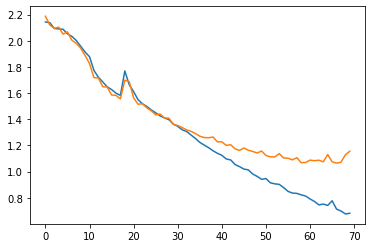

In [15]:
plt.plot(trainer.loss_history[0])
plt.plot(trainer.loss_history[1])

In [16]:
y_prob, y_pred, y_true = trainer.evaluate(testloader1)

In [17]:
# evaluated on test dataset from replica 1
cr = sklearn.metrics.classification_report(y_true, y_pred, target_names=ligands, output_dict=True)
cr_df = pd.DataFrame(cr).transpose()
print(cr_df)

              precision    recall  f1-score       support
TNF            0.667075  0.731183  0.697660   1488.000000
R84            0.780562  0.811309  0.795639   1574.000000
PIC            0.624845  0.659922  0.641905   1532.000000
P3K            0.717949  0.673844  0.695198   1579.000000
FLA            0.511611  0.467507  0.488565   1508.000000
CpG            0.546353  0.458254  0.498440   1569.000000
FSL            0.437765  0.335496  0.379868   1541.000000
LPS            0.517405  0.614662  0.561856   1596.000000
UST            0.831828  0.967827  0.894689   1523.000000
accuracy       0.635226  0.635226  0.635226      0.635226
macro avg      0.626155  0.635556  0.628202  13910.000000
weighted avg   0.626032  0.635226  0.627972  13910.000000


In [18]:
y_prob_cross, y_pred_cross, y_true_cross = trainer.evaluate(testloader2)

In [19]:
# evaluated on test dataset from replica 2
cr_cross = sklearn.metrics.classification_report(y_true_cross, y_pred_cross, target_names=ligands, output_dict=True)
cr_cross_df = pd.DataFrame(cr_cross).transpose()
print(cr_cross_df)

              precision    recall  f1-score       support
TNF            0.482245  0.551047  0.514356   1528.000000
R84            0.628674  0.664975  0.646315   1576.000000
PIC            0.373023  0.533955  0.439211   1502.000000
P3K            0.457612  0.325340  0.380303   1543.000000
FLA            0.310423  0.350509  0.329250   1572.000000
CpG            0.269984  0.212452  0.237787   1558.000000
FSL            0.201600  0.165899  0.182015   1519.000000
LPS            0.332476  0.423607  0.372549   1525.000000
UST            0.592803  0.394455  0.473704   1587.000000
accuracy       0.402588  0.402588  0.402588      0.402588
macro avg      0.405427  0.402471  0.397277  13910.000000
weighted avg   0.406664  0.402588  0.397949  13910.000000


In [20]:
cr_cross_df

,precision,recall,f1-score,support
TNF,0.482245,0.551047,0.514356,1528.000000
R84,0.628674,0.664975,0.646315,1576.000000
PIC,0.373023,0.533955,0.439211,1502.000000
P3K,0.457612,0.325340,0.380303,1543.000000
FLA,0.310423,0.350509,0.329250,1572.000000
CpG,0.269984,0.212452,0.237787,1558.000000
FSL,0.201600,0.165899,0.182015,1519.000000
LPS,0.332476,0.423607,0.372549,1525.000000
UST,0.592803,0.394455,0.473704,1587.000000
accuracy,0.402588,0.402588,0.402588,0.402588


In [21]:
net2 = LSTM(input_size=input_size, hidden_sizes=hidden_size, output_size=output_size, num_layers=3, device=device)

In [22]:
net2.train()

LSTM(
  (lstm): LSTM(1, 98, num_layers=3, batch_first=True)
  (fc1): Linear(in_features=98, out_features=9, bias=True)
)

In [23]:
trainer2 = LSTMTrainer(model=net2, device=device)

In [24]:
trainer2.train(trainloader2, valloader2, batch_size=batch_size, n_epochs=epochs)

  1%|█▏                                                                                 | 1/70 [00:07<08:58,  7.81s/it]

Epoch 001: | Training Loss: 2.172334759377776 | Validation Loss: 2.188424360861472


  3%|██▎                                                                                | 2/70 [00:15<08:54,  7.86s/it]

Epoch 002: | Training Loss: 2.187598818841791 | Validation Loss: 2.1890555204601463


  4%|███▌                                                                               | 3/70 [00:23<08:52,  7.95s/it]

Epoch 003: | Training Loss: 2.186705872986985 | Validation Loss: 2.187041394207456


  6%|████▋                                                                              | 4/70 [00:31<08:44,  7.94s/it]

Epoch 004: | Training Loss: 2.1751301514974597 | Validation Loss: 2.103883085447714


  7%|█████▉                                                                             | 5/70 [00:39<08:42,  8.04s/it]

Epoch 005: | Training Loss: 2.150115924991473 | Validation Loss: 2.197954317845336


  9%|███████                                                                            | 6/70 [00:47<08:33,  8.02s/it]

Epoch 006: | Training Loss: 2.197602695929511 | Validation Loss: 2.1977369883738525


 10%|████████▎                                                                          | 7/70 [00:55<08:24,  8.00s/it]

Epoch 007: | Training Loss: 2.1975189076813586 | Validation Loss: 2.197483237730254


 11%|█████████▍                                                                         | 8/70 [01:03<08:15,  7.99s/it]

Epoch 008: | Training Loss: 2.1971288253118213 | Validation Loss: 2.197811654948313


 13%|██████████▋                                                                        | 9/70 [01:11<08:06,  7.98s/it]

Epoch 009: | Training Loss: 2.197097255113844 | Validation Loss: 2.197318991389843


 14%|███████████▋                                                                      | 10/70 [01:19<07:57,  7.96s/it]

Epoch 010: | Training Loss: 2.197400644398758 | Validation Loss: 2.197373734701664


 16%|████████████▉                                                                     | 11/70 [01:27<07:52,  8.01s/it]

Epoch 011: | Training Loss: 2.1827138908789316 | Validation Loss: 2.096515164462798


 17%|██████████████                                                                    | 12/70 [01:35<07:43,  7.99s/it]

Epoch 012: | Training Loss: 1.9803851640242713 | Validation Loss: 1.9126215008420682


 19%|███████████████▏                                                                  | 13/70 [01:43<07:37,  8.03s/it]

Epoch 013: | Training Loss: 1.8451104923557906 | Validation Loss: 1.8280153837772684


 20%|████████████████▍                                                                 | 14/70 [01:51<07:26,  7.98s/it]

Epoch 014: | Training Loss: 1.7645149524872739 | Validation Loss: 1.7312275472037288


 21%|█████████████████▌                                                                | 15/70 [01:59<07:15,  7.93s/it]

Epoch 015: | Training Loss: 1.685194163008452 | Validation Loss: 1.663649016017214


 23%|██████████████████▋                                                               | 16/70 [02:07<07:07,  7.92s/it]

Epoch 016: | Training Loss: 1.6117130191183748 | Validation Loss: 1.6029700292359799


 24%|███████████████████▉                                                              | 17/70 [02:15<06:58,  7.90s/it]

Epoch 017: | Training Loss: 1.5620858178204453 | Validation Loss: 1.5733222430999125


 26%|█████████████████████                                                             | 18/70 [02:23<06:52,  7.93s/it]

Epoch 018: | Training Loss: 1.5279861856565724 | Validation Loss: 1.528742030126239


 27%|██████████████████████▎                                                           | 19/70 [02:31<06:44,  7.92s/it]

Epoch 019: | Training Loss: 1.4930749965480787 | Validation Loss: 1.5043174072143135


 29%|███████████████████████▍                                                          | 20/70 [02:39<06:39,  8.00s/it]

Epoch 020: | Training Loss: 1.4620646585184072 | Validation Loss: 1.4601105369559122


 30%|████████████████████████▌                                                         | 21/70 [02:47<06:30,  7.97s/it]

Epoch 021: | Training Loss: 1.4283253914729377 | Validation Loss: 1.4429223455420328


 31%|█████████████████████████▊                                                        | 22/70 [02:55<06:21,  7.96s/it]

Epoch 022: | Training Loss: 1.3969476637394833 | Validation Loss: 1.4083215304470937


 33%|██████████████████████████▉                                                       | 23/70 [03:03<06:17,  8.04s/it]

Epoch 023: | Training Loss: 1.3677985136943425 | Validation Loss: 1.3854147660622902


 34%|████████████████████████████                                                      | 24/70 [03:11<06:11,  8.07s/it]

Epoch 024: | Training Loss: 1.3445037986746609 | Validation Loss: 1.3687791780594292


 36%|█████████████████████████████▎                                                    | 25/70 [03:19<06:01,  8.04s/it]

Epoch 025: | Training Loss: 1.3155709613702198 | Validation Loss: 1.3389092016657558


 37%|██████████████████████████████▍                                                   | 26/70 [03:27<05:51,  7.98s/it]

Epoch 026: | Training Loss: 1.288579420784166 | Validation Loss: 1.3388497556021455


 39%|███████████████████████████████▋                                                  | 27/70 [03:35<05:41,  7.94s/it]

Epoch 027: | Training Loss: 1.2690891586072959 | Validation Loss: 1.3104423951665196


 40%|████████████████████████████████▊                                                 | 28/70 [03:43<05:34,  7.96s/it]

Epoch 028: | Training Loss: 1.2436133293608977 | Validation Loss: 1.285348601297501


 41%|█████████████████████████████████▉                                                | 29/70 [03:51<05:24,  7.91s/it]

Epoch 029: | Training Loss: 1.218933578472225 | Validation Loss: 1.2768604416366016


 43%|███████████████████████████████████▏                                              | 30/70 [03:58<05:15,  7.88s/it]

Epoch 030: | Training Loss: 1.2017116709106002 | Validation Loss: 1.2574902056554043


 44%|████████████████████████████████████▎                                             | 31/70 [04:06<05:06,  7.85s/it]

Epoch 031: | Training Loss: 1.1793782449060706 | Validation Loss: 1.2382234356818942


 46%|█████████████████████████████████████▍                                            | 32/70 [04:14<04:59,  7.87s/it]

Epoch 032: | Training Loss: 1.1553816775267924 | Validation Loss: 1.2212064124028617


 47%|██████████████████████████████████████▋                                           | 33/70 [04:22<04:52,  7.91s/it]

Epoch 033: | Training Loss: 1.139315864941245 | Validation Loss: 1.2160466042680478


 49%|███████████████████████████████████████▊                                          | 34/70 [04:30<04:44,  7.92s/it]

Epoch 034: | Training Loss: 1.1470503068627478 | Validation Loss: 1.278939693345936


 50%|█████████████████████████████████████████                                         | 35/70 [04:38<04:35,  7.87s/it]

Epoch 035: | Training Loss: 1.1038336318448345 | Validation Loss: 1.2182731606544706


 51%|██████████████████████████████████████████▏                                       | 36/70 [04:46<04:27,  7.87s/it]

Epoch 036: | Training Loss: 1.0718997908587842 | Validation Loss: 1.185691717567794


 53%|███████████████████████████████████████████▎                                      | 37/70 [04:53<04:19,  7.85s/it]

Epoch 037: | Training Loss: 1.0535632103544648 | Validation Loss: 1.169507814383288


 54%|████████████████████████████████████████████▌                                     | 38/70 [05:01<04:11,  7.85s/it]

Epoch 038: | Training Loss: 1.035903189941716 | Validation Loss: 1.1495156408449925


 56%|█████████████████████████████████████████████▋                                    | 39/70 [05:09<04:05,  7.92s/it]

Epoch 039: | Training Loss: 1.012987428839685 | Validation Loss: 1.1377997731943743


 57%|██████████████████████████████████████████████▊                                   | 40/70 [05:18<04:00,  8.02s/it]

Epoch 040: | Training Loss: 1.011288465529817 | Validation Loss: 1.1810369789600372


 59%|████████████████████████████████████████████████                                  | 41/70 [05:26<03:53,  8.05s/it]

Epoch 041: | Training Loss: 0.9868978663571578 | Validation Loss: 1.1476434964105624


 60%|█████████████████████████████████████████████████▏                                | 42/70 [05:34<03:46,  8.09s/it]

Epoch 042: | Training Loss: 0.9417869477870818 | Validation Loss: 1.1323658531412073


 61%|██████████████████████████████████████████████████▎                               | 43/70 [05:42<03:41,  8.22s/it]

Epoch 043: | Training Loss: 0.9287392417650675 | Validation Loss: 1.1076351513556384


 63%|███████████████████████████████████████████████████▌                              | 44/70 [05:51<03:33,  8.20s/it]

Epoch 044: | Training Loss: 0.8955289713273917 | Validation Loss: 1.1155273865122315


 64%|████████████████████████████████████████████████████▋                             | 45/70 [05:59<03:24,  8.16s/it]

Epoch 045: | Training Loss: 0.8870126229424207 | Validation Loss: 1.1124855203366062


 66%|█████████████████████████████████████████████████████▉                            | 46/70 [06:07<03:14,  8.12s/it]

Epoch 046: | Training Loss: 0.8559581120862165 | Validation Loss: 1.1188056132662187


 67%|███████████████████████████████████████████████████████                           | 47/70 [06:15<03:06,  8.12s/it]

Epoch 047: | Training Loss: 0.8370882830429953 | Validation Loss: 1.081889289781588


 69%|████████████████████████████████████████████████████████▏                         | 48/70 [06:23<02:58,  8.09s/it]

Epoch 048: | Training Loss: 0.8172858916051903 | Validation Loss: 1.0741063629815337


 70%|█████████████████████████████████████████████████████████▍                        | 49/70 [06:31<02:50,  8.10s/it]

Epoch 049: | Training Loss: 0.7891298921787355 | Validation Loss: 1.0597774711770749


 71%|██████████████████████████████████████████████████████████▌                       | 50/70 [06:39<02:41,  8.10s/it]

Epoch 050: | Training Loss: 0.7741201537765369 | Validation Loss: 1.0846622769438892


 73%|███████████████████████████████████████████████████████████▋                      | 51/70 [06:47<02:33,  8.10s/it]

Epoch 051: | Training Loss: 0.8900143187863904 | Validation Loss: 1.1708515095054557


 74%|████████████████████████████████████████████████████████████▉                     | 52/70 [06:55<02:25,  8.08s/it]

Epoch 052: | Training Loss: 0.8102406480137093 | Validation Loss: 1.032074839423556


 76%|██████████████████████████████████████████████████████████████                    | 53/70 [07:03<02:16,  8.05s/it]

Epoch 053: | Training Loss: 0.7118915686837382 | Validation Loss: 1.036862624074341


 77%|███████████████████████████████████████████████████████████████▎                  | 54/70 [07:11<02:08,  8.03s/it]

Epoch 054: | Training Loss: 0.7030688738293523 | Validation Loss: 1.0176475633175002


 79%|████████████████████████████████████████████████████████████████▍                 | 55/70 [07:19<02:00,  8.03s/it]

Epoch 055: | Training Loss: 0.6717786561572214 | Validation Loss: 1.0359484074859444


 80%|█████████████████████████████████████████████████████████████████▌                | 56/70 [07:27<01:51,  7.97s/it]

Epoch 056: | Training Loss: 0.6756360507919631 | Validation Loss: 1.0560497392755035


 81%|██████████████████████████████████████████████████████████████████▊               | 57/70 [07:35<01:42,  7.91s/it]

Epoch 057: | Training Loss: 0.638082176629471 | Validation Loss: 1.004365559291402


 83%|███████████████████████████████████████████████████████████████████▉              | 58/70 [07:43<01:34,  7.87s/it]

Epoch 058: | Training Loss: 0.6311322579796428 | Validation Loss: 1.0850890757293876


 84%|█████████████████████████████████████████████████████████████████████             | 59/70 [07:50<01:26,  7.85s/it]

Epoch 059: | Training Loss: 0.6092089358460483 | Validation Loss: 1.0242199000962284


 86%|██████████████████████████████████████████████████████████████████████▎           | 60/70 [07:58<01:18,  7.83s/it]

Epoch 060: | Training Loss: 0.5883633169883243 | Validation Loss: 1.0097074317275931


 87%|███████████████████████████████████████████████████████████████████████▍          | 61/70 [08:06<01:10,  7.82s/it]

Epoch 061: | Training Loss: 0.58301799275426 | Validation Loss: 0.9881878388584207


 89%|████████████████████████████████████████████████████████████████████████▋         | 62/70 [08:14<01:02,  7.81s/it]

Epoch 062: | Training Loss: 0.5482901901485909 | Validation Loss: 1.0380370020866394


 90%|█████████████████████████████████████████████████████████████████████████▊        | 63/70 [08:22<00:54,  7.80s/it]

Epoch 063: | Training Loss: 0.5435616051689771 | Validation Loss: 1.0115866297428762


 91%|██████████████████████████████████████████████████████████████████████████▉       | 64/70 [08:29<00:46,  7.80s/it]

Epoch 064: | Training Loss: 0.591707705356078 | Validation Loss: 0.9790334290047304


 93%|████████████████████████████████████████████████████████████████████████████▏     | 65/70 [08:37<00:38,  7.79s/it]

Epoch 065: | Training Loss: 0.49308041014222237 | Validation Loss: 0.9517065847138746


 94%|█████████████████████████████████████████████████████████████████████████████▎    | 66/70 [08:45<00:31,  7.79s/it]

Epoch 066: | Training Loss: 0.5007502775736279 | Validation Loss: 0.9820216619366899


 96%|██████████████████████████████████████████████████████████████████████████████▍   | 67/70 [08:53<00:23,  7.79s/it]

Epoch 067: | Training Loss: 0.4736175473671047 | Validation Loss: 1.0181258490326208


 97%|███████████████████████████████████████████████████████████████████████████████▋  | 68/70 [09:00<00:15,  7.79s/it]

Epoch 068: | Training Loss: 0.4694129276512958 | Validation Loss: 0.992078441545504


 99%|████████████████████████████████████████████████████████████████████████████████▊ | 69/70 [09:08<00:07,  7.79s/it]

Epoch 069: | Training Loss: 0.4524177747563235 | Validation Loss: 1.0012675782135867


100%|██████████████████████████████████████████████████████████████████████████████████| 70/70 [09:16<00:00,  7.95s/it]

Epoch 070: | Training Loss: 0.43453872064627697 | Validation Loss: 0.9714545839970264


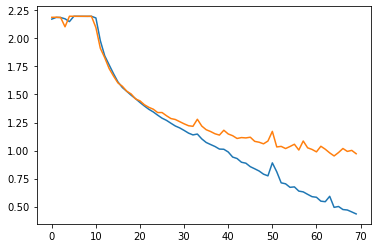

In [25]:
plt.plot(trainer2.loss_history[0])
plt.plot(trainer2.loss_history[1])

In [26]:
y_prob2, y_pred2, y_true2 = trainer2.evaluate(testloader2)

In [27]:
cr2 = sklearn.metrics.classification_report(y_true2, y_pred2, target_names=ligands, output_dict=True)
cr2_df = pd.DataFrame(cr2).transpose()
print(cr2_df)

              precision    recall  f1-score       support
TNF            0.731353  0.725131  0.728229   1528.000000
R84            0.798851  0.793782  0.796308   1576.000000
PIC            0.786799  0.793609  0.790189   1502.000000
P3K            0.730139  0.750486  0.740173   1543.000000
FLA            0.688971  0.596056  0.639154   1572.000000
CpG            0.640356  0.692555  0.665433   1558.000000
FSL            0.616066  0.641211  0.628387   1519.000000
LPS            0.674966  0.657705  0.666224   1525.000000
UST            0.982054  1.000000  0.990946   1587.000000
accuracy       0.739684  0.739684  0.739684      0.739684
macro avg      0.738839  0.738948  0.738338  13910.000000
weighted avg   0.739702  0.739684  0.739130  13910.000000


In [28]:
y_prob2_cross, y_pred2_cross, y_true2_cross = trainer2.evaluate(testloader1)

In [29]:
cr2_cross = sklearn.metrics.classification_report(y_true2_cross, y_pred2_cross, target_names=ligands, output_dict=True)
cr2_df_cross = pd.DataFrame(cr2_cross).transpose()
print(cr2_df_cross)

              precision    recall  f1-score       support
TNF            0.459025  0.594758  0.518150   1488.000000
R84            0.638547  0.726175  0.679548   1574.000000
PIC            0.402473  0.573760  0.473089   1532.000000
P3K            0.403846  0.412286  0.408023   1579.000000
FLA            0.262500  0.236737  0.248954   1508.000000
CpG            0.250141  0.281708  0.264988   1569.000000
FSL            0.182361  0.178456  0.180387   1541.000000
LPS            0.330547  0.322055  0.326246   1596.000000
UST            0.713592  0.096520  0.170040   1523.000000
accuracy       0.380518  0.380518  0.380518      0.380518
macro avg      0.404781  0.380273  0.363269  13910.000000
weighted avg   0.404461  0.380518  0.363658  13910.000000


In [30]:
# maybe some more plots here

core.dataset2.DatasetSplit

torch.utils.data.dataset.Subset